In [2]:
import numpy as np
import sep

In [3]:
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
import imageio
from scipy.ndimage import zoom
%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [4]:
fits_file_name='hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits'

In [5]:
with fits.open(fits_file_name) as hdul:
    data = hdul[0].data
    header = hdul[0].header  #

In [6]:
# orjinal_size = data.shape
# target_size = (256, 256)

# zoom_factor = (target_size[0] / orjinal_size[0], target_size[1] / orjinal_size[1])

# data = zoom(data, zoom_factor)

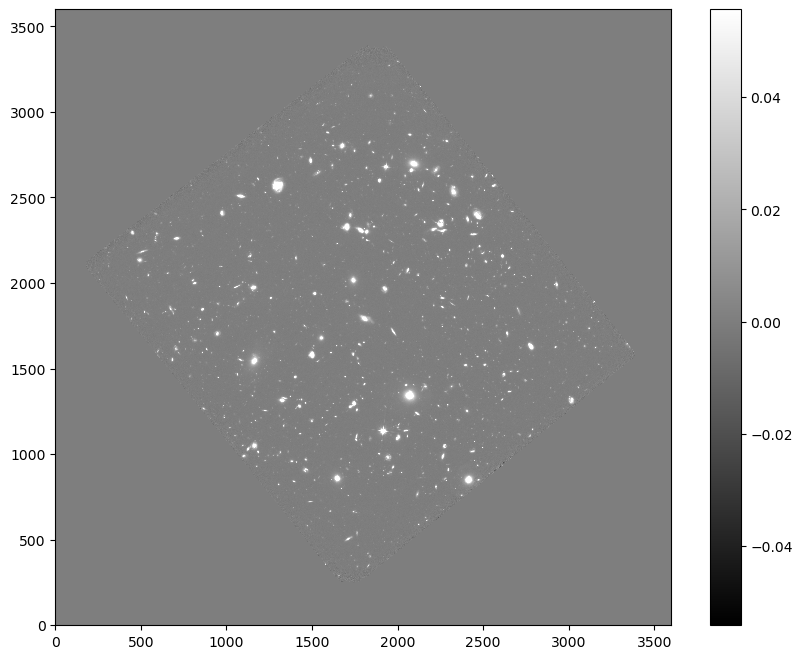

In [7]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig("f105w_image_1.png")
plt.colorbar();

In [8]:
data = data.byteswap().newbyteorder()

In [9]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [10]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [11]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

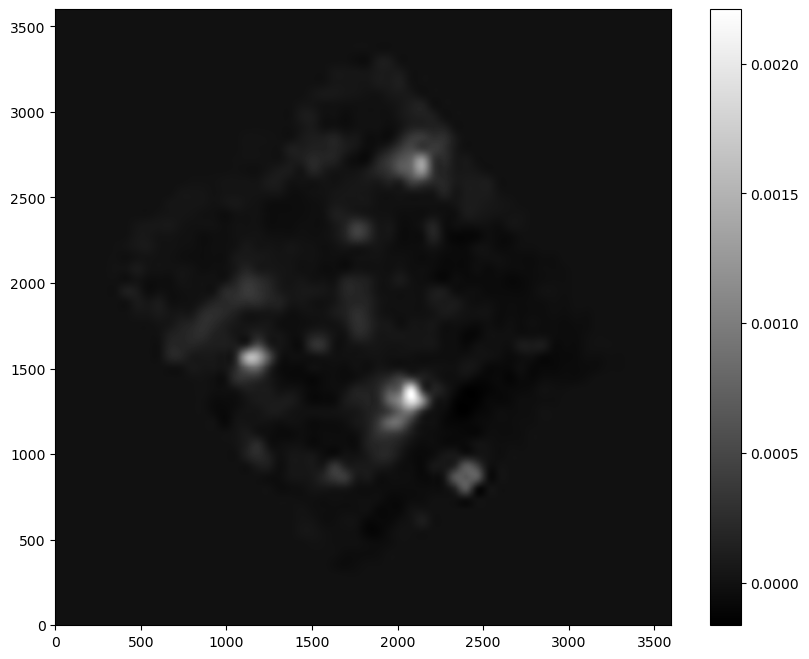

In [12]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig("f105w_image_2.png")
plt.colorbar();

In [13]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

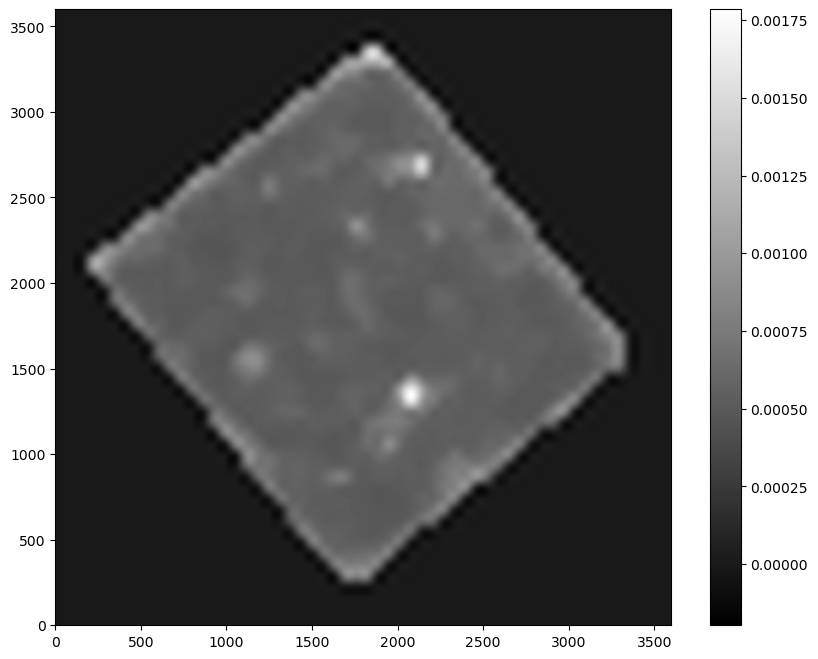

In [14]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig("f105w_image_3.png")
plt.colorbar();

In [15]:
# subtract the background
data_sub = data - bkg


In [16]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [17]:
# how many objects were detected
len(objects)

8646

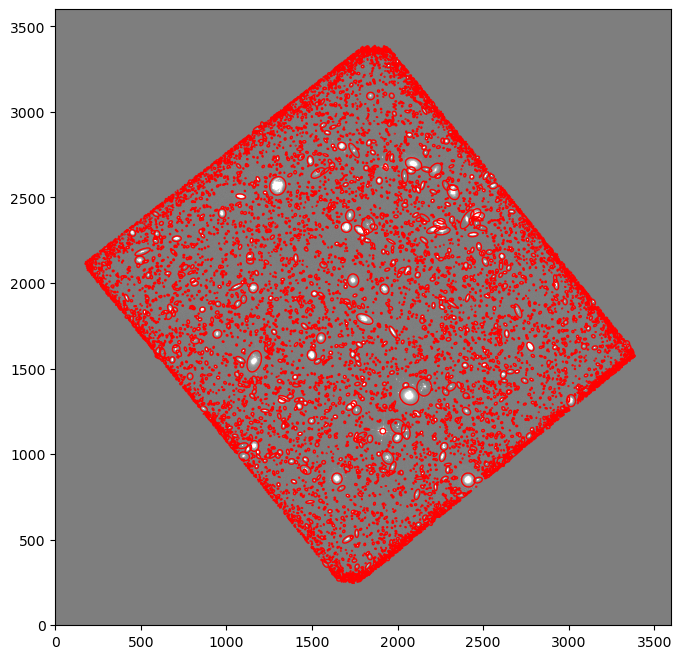

In [18]:

from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("f105w_image_4.png")

In [19]:
bins = int(np.sqrt(len(objects)))

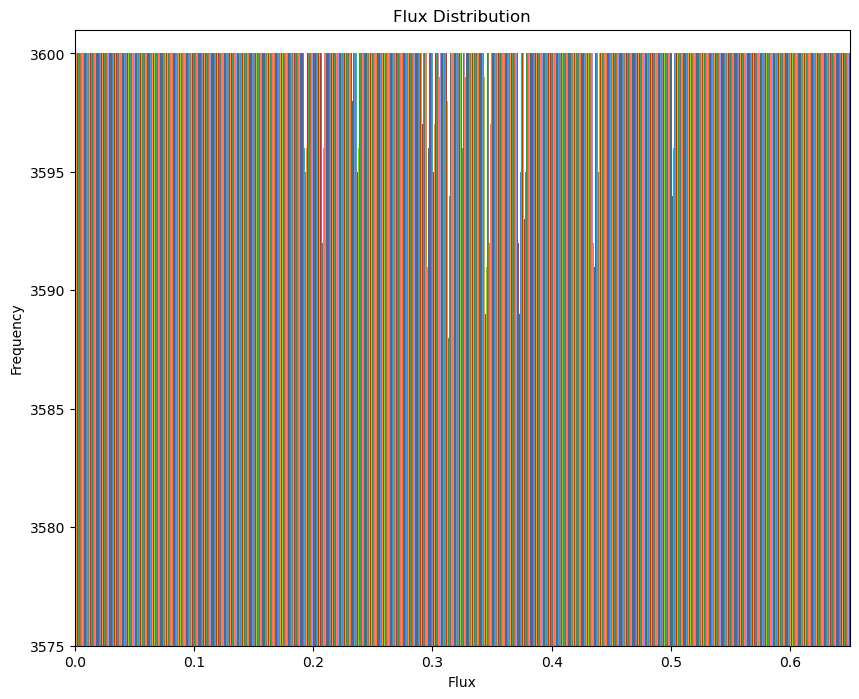

In [25]:
plt.hist(data, bins=bins)  
plt.xlabel('Flux')
plt.xlim(0,0.65)
plt.ylabel('Frequency')
plt.ylim(3575, 3601)
plt.title('Flux Distribution')
plt.savefig('f105w_image_histogram.png')
plt.show()


In [26]:
print('mean:',np.mean(data), 
'median:',np.median(data), 
'std:',np.std(data))

mean: 0.00079129904 median: 0.0 std: 0.054868452


In [27]:
mean_flux = np.mean(data)
std_flux = np.std(data)

In [28]:
deviations = np.abs(data - mean_flux) / std_flux
max_deviation_indices = np.unravel_index(np.argmax(deviations), deviations.shape)
largest_outlier_value = data[max_deviation_indices]
number_of_std_devs = deviations[max_deviation_indices]
max_deviation = deviations[max_deviation_index]

NameError: name 'max_deviation_index' is not defined

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
y, x = max_deviation_indices
ax.scatter(x, y, color='red')  
plt.show()

In [ ]:
plt.imshow(data, cmap='gray')  # Use appropriate colormap
plt.colorbar()
plt.scatter(max_deviation_indices[1], max_deviation_indices[0], color='red')  # Mark the outlier
plt.title(f"Largest Outlier {max_deviation:.2f} STDs away from Mean")
plt.show()